In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('green transportation system.csv')
df

,energy_efficiency,co2_emissions,electric_vehicle_penetration,cost_efficiency,public_transport_usage
0,17.490802,106.046123,46.499916,2.095361,27.934722
1,29.014286,99.936814,19.225600,1.648231,15.689067
2,24.639879,76.423087,27.331985,2.911246,17.581553
3,21.973170,141.090001,43.164032,1.047446,20.840268
4,13.120373,121.493624,34.104467,1.969641,22.219200
...,...,...,...,...,...
9995,27.153120,181.555794,57.613773,2.385085,47.346712
9996,27.950177,57.022094,47.391211,2.411317,23.571614
9997,28.934158,95.554770,10.972793,1.173924,54.939705
9998,17.949760,116.498001,30.050242,1.585799,41.260655


In [8]:
df.describe()

,energy_efficiency,co2_emissions,electric_vehicle_penetration,cost_efficiency,public_transport_usage
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.883191,125.679482,35.002520,1.746783,39.811828
std,5.752603,43.394183,14.338688,0.722486,17.357051
min,10.000233,50.023662,10.002406,0.500014,10.001004
25%,14.926577,88.091870,22.687396,1.117143,24.656333
50%,19.850572,125.884516,35.103405,1.750076,39.623032
75%,24.800127,163.471883,47.233693,2.367791,55.028622
max,29.994353,199.988724,59.995049,2.999473,69.998329


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [10]:
X_train,X_test=train_test_split(df,test_size=0.2,random_state=42)
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [11]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [12]:
scaled_data=scaler.transform(df)

In [13]:
scaled_data.shape

(10000, 5)

In [14]:
pca=PCA(n_components=2)   #how much features we want

In [15]:
pca.fit(scaled_data)

PCA(n_components=2)

In [16]:
X_new=pca.transform(scaled_data)

In [17]:
scaled_data.shape

(10000, 5)

In [18]:
X_new.shape

(10000, 2)

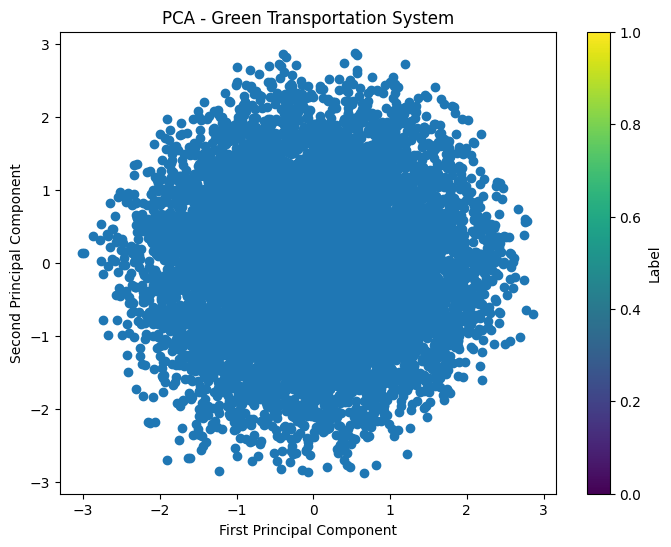

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - Green Transportation System')
plt.colorbar(label='Label')
plt.show()

In [21]:
pca.components_

array([[-0.0332976 ,  0.7035245 , -0.36355117, -0.51825272, -0.32123078],
       [-0.3733762 , -0.13592684,  0.71739931, -0.42917625, -0.37849714]])

In [22]:
pca.explained_variance_

array([1.0335674 , 1.01598567])

In [23]:
pca.explained_variance_.cumsum()  #cumulative sum of array

array([1.0335674 , 2.04955307])

In [25]:
pca.explained_variance_ratio_

array([0.20669281, 0.20317681])

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.20669281, 0.40986962])

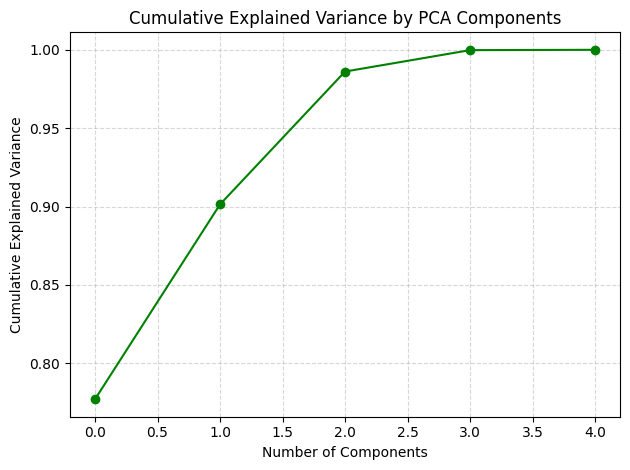

In [28]:
# PCA
pca = PCA()
pca.fit(df)

# Cumulative explained variance plot
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', color='green')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

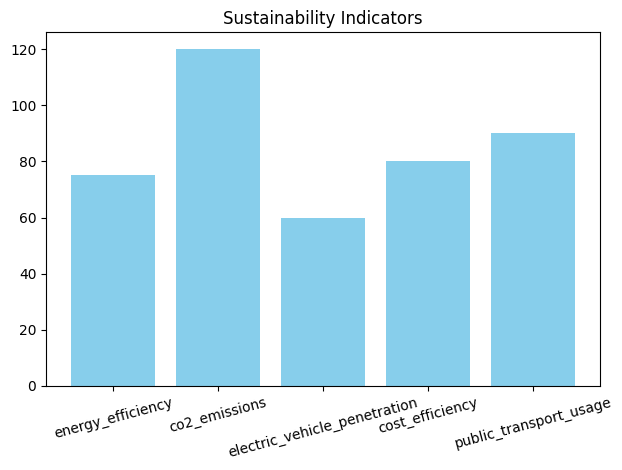

In [29]:
import matplotlib.pyplot as plt

categories = ['energy_efficiency', 'co2_emissions', 'electric_vehicle_penetration', 
              'cost_efficiency', 'public_transport_usage']
values = [75, 120, 60, 80, 90]

plt.bar(categories, values, color='skyblue')
plt.xticks(rotation=15)
plt.title('Sustainability Indicators')
plt.tight_layout()
plt.show()